In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report

print("TensorFlow:", tf.__version__)


TensorFlow: 2.18.0


In [4]:

# Doğru path: data klasörü yok, dosyalar direkt kökte
with open("/kaggle/input/traffic-signs-preprocessed-3/train.p", "rb") as f:
    train_data = pickle.load(f)
with open("/kaggle/input/traffic-signs-preprocessed-3/valid.p", "rb") as f:
    val_data = pickle.load(f)
with open("/kaggle/input/traffic-signs-preprocessed-3/test.p", "rb") as f:
    test_data = pickle.load(f)

X_train, y_train = train_data["features"], train_data["labels"]
X_val, y_val     = val_data["features"], val_data["labels"]
X_test, y_test   = test_data["features"], test_data["labels"]

print("Eğitim verisi:", X_train.shape)
print("Doğrulama verisi:", X_val.shape)
print("Test verisi:", X_test.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/traffic-signs-preprocessed-3/train.p'

In [ ]:
import os
print(os.listdir("/kaggle/input"))


In [ ]:
print(os.listdir("/kaggle/input/traffic-signs-preprocessed-3"))


In [ ]:
print(os.listdir("/kaggle/input/traffic-signs-preprocessed-3"))


In [ ]:
with open("/kaggle/input/my-traffic-data/train.p", "rb") as f:
    train_data = pickle.load(f)


In [ ]:

X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0

# Örnek görseller gösterelim
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [ ]:

num_classes = len(np.unique(y_train))

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=X_train.shape[1:]),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


In [ ]:

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")
early = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early, reduce])


In [ ]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend(); plt.title("Loss")
plt.show()


In [5]:

y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", annot=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices("GPU"))


In [ ]:
/kaggle/input/traffic-signs-preprocessed/


In [ ]:
with open("/kaggle/input/traffic-signs-preprocessed/train.p", "rb") as f:
    train_data = pickle.load(f)

with open("/kaggle/input/traffic-signs-preprocessed/valid.p", "rb") as f:
    val_data = pickle.load(f)

with open("/kaggle/input/traffic-signs-preprocessed/test.p", "rb") as f:
    test_data = pickle.load(f)


In [ ]:
import os
print(os.listdir("/kaggle/input/traffic-signs-preprocessed"))


In [ ]:
['train.p', 'valid.p', 'test.p']


In [7]:
import pickle

with open("/kaggle/input/traffic-signs-preprocessed/train.pickle", "rb") as f:
    train_data = pickle.load(f)

with open("/kaggle/input/traffic-signs-preprocessed/valid.pickle", "rb") as f:
    val_data = pickle.load(f)

with open("/kaggle/input/traffic-signs-preprocessed/test.pickle", "rb") as f:
    test_data = pickle.load(f)


In [8]:
import pickle

# Verileri yükle
with open("/kaggle/input/traffic-signs-preprocessed/train.pickle", "rb") as f:
    train_data = pickle.load(f)

with open("/kaggle/input/traffic-signs-preprocessed/valid.pickle", "rb") as f:
    val_data = pickle.load(f)

with open("/kaggle/input/traffic-signs-preprocessed/test.pickle", "rb") as f:
    test_data = pickle.load(f)

# Özellikler (X) ve etiketler (y) ayır
X_train, y_train = train_data["features"], train_data["labels"]
X_val, y_val     = val_data["features"], val_data["labels"]
X_test, y_test   = test_data["features"], test_data["labels"]

# Boyutları yazdır
print("Eğitim verisi:", X_train.shape)
print("Doğrulama verisi:", X_val.shape)
print("Test verisi:", X_test.shape)


Eğitim verisi: (34799, 32, 32, 3)
Doğrulama verisi: (4410, 32, 32, 3)
Test verisi: (12630, 32, 32, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# CNN Modeli
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 sınıf var
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758803279.240887      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758803279.241593      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,355 (645.92 KB)

 Trainable params: 164,907 (644.17 KB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Erken durdurma: doğrulama kaybı iyileşmezse eğitimi durdurur
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# En iyi modeli kaydetmek için
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

# Modeli eğit
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,            # hızlı deneme için 10 epoch, istersen artırabilirsin
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/10


I0000 00:00:1758803432.619462     119 service.cc:148] XLA service 0x7aed9c007960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758803432.620746     119 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758803432.620773     119 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758803433.177617     119 cuda_dnn.cc:529] Loaded cuDNN version 90300


 44/544 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0835 - loss: 4.2318

I0000 00:00:1758803437.716862     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


544/544 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4592 - loss: 2.1393 - val_accuracy: 0.9327 - val_loss: 0.2557
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9461 - loss: 0.1762 - val_accuracy: 0.9388 - val_loss: 0.1899
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9770 - loss: 0.0761 - val_accuracy: 0.9651 - val_loss: 0.1236
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0490 - val_accuracy: 0.9678 - val_loss: 0.1126
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0371 - val_accuracy: 0.9476 - val_loss: 0.1943
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0412 - val_accuracy: 0.9617 - val_loss: 0.1517
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9878 - loss: 0.0402 - val_accuracy: 0.9526 - val_loss: 0.1779


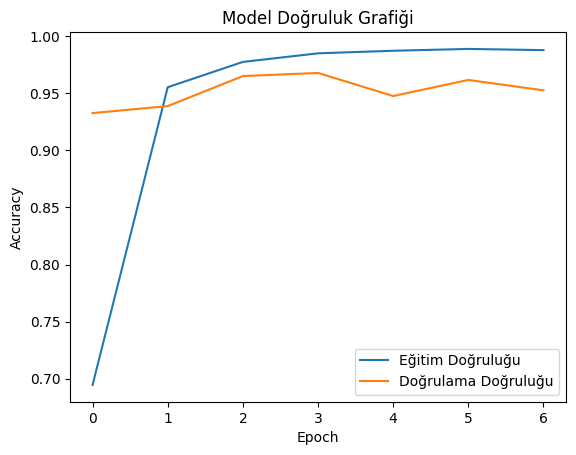

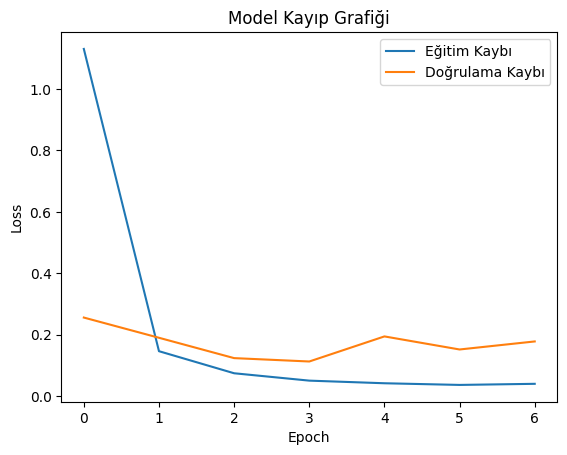

In [12]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title("Model Doğruluk Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title("Model Kayıp Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Doğruluğu:", test_acc)


Test Doğruluğu: 0.9520189762115479


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


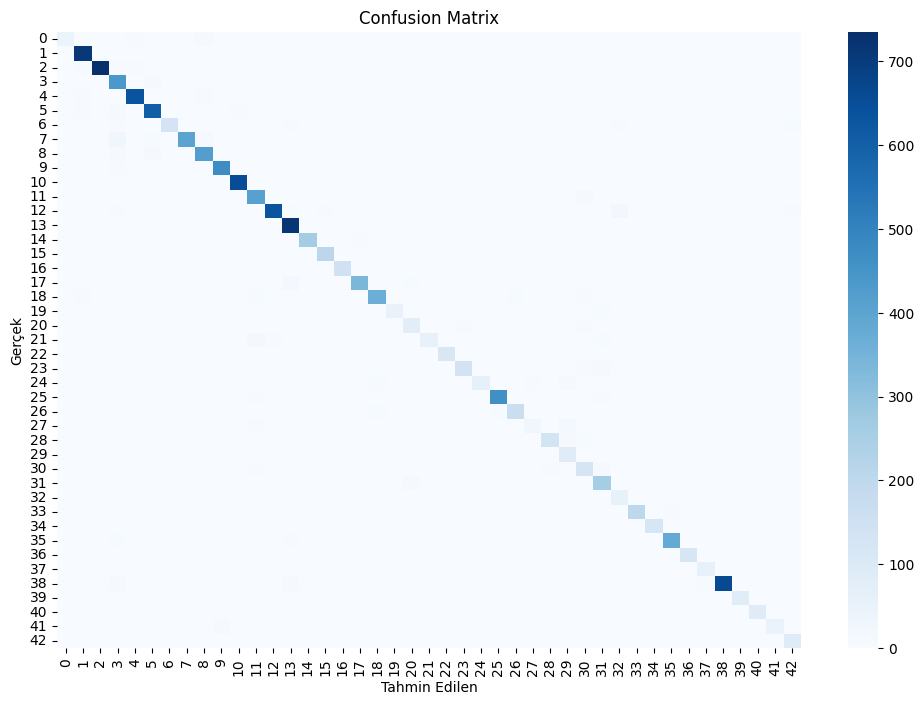

              precision    recall  f1-score   support

           0       0.91      0.72      0.80        60
           1       0.96      0.99      0.97       720
           2       0.99      0.98      0.98       750
           3       0.83      0.97      0.90       450
           4       0.98      0.96      0.97       660
           5       0.95      0.96      0.96       630
           6       1.00      0.87      0.93       150
           7       0.99      0.89      0.94       450
           8       0.94      0.94      0.94       450
           9       0.97      0.98      0.98       480
          10       0.99      0.99      0.99       660
          11       0.90      0.98      0.94       420
          12       0.99      0.92      0.96       690
          13       0.93      1.00      0.97       720
          14       0.99      0.97      0.98       270
          15       0.97      0.99      0.98       210
          16       0.99      1.00      1.00       150
          17       0.97    

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Test verisi tahmini
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [15]:
# Modeli kaydet
model.save("traffic_sign_model.h5")
print("Model kaydedildi: traffic_sign_model.h5")


Model kaydedildi: traffic_sign_model.h5


In [16]:
from tensorflow.keras.models import load_model

# Kaydedilen modeli yükle
loaded_model = load_model("traffic_sign_model.h5")
print("Model yüklendi!")

# Test setinde doğruluğunu tekrar kontrol edelim
test_loss, test_acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print("Yüklenen modelin Test Doğruluğu:", test_acc)


Model yüklendi!
Yüklenen modelin Test Doğruluğu: 0.9520189762115479


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


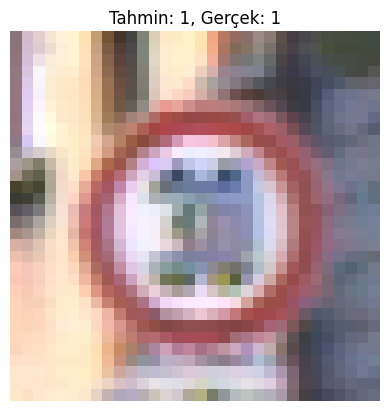

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Test setinden bir örnek seçelim
sample_image = X_test[100]   # 100. resmi seçiyoruz (istersen başka index verebilirsin)
sample_label = y_test[100]

# Model tahmini
prediction = loaded_model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = np.argmax(prediction)

# Görseli çizdirelim
plt.imshow(sample_image)
plt.title(f"Tahmin: {predicted_class}, Gerçek: {sample_label}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


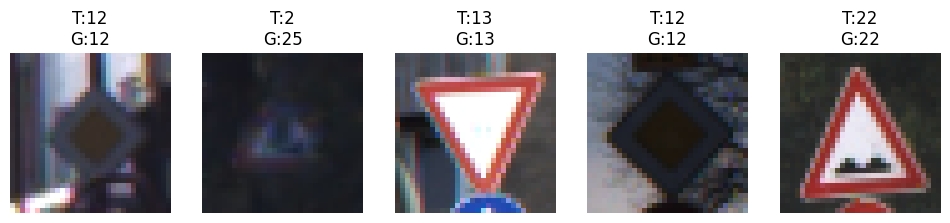

In [18]:
plt.figure(figsize=(12, 6))

for i, index in enumerate([10, 50, 120, 300, 500]):  # farklı örnekler seçtik
    sample_image = X_test[index]
    sample_label = y_test[index]

    prediction = loaded_model.predict(np.expand_dims(sample_image, axis=0))
    predicted_class = np.argmax(prediction)

    plt.subplot(1, 5, i+1)
    plt.imshow(sample_image)
    plt.title(f"T:{predicted_class}\nG:{sample_label}")
    plt.axis("off")

plt.show()


In [19]:
import pandas as pd

# Etiket isimlerini oku
labels = pd.read_csv("/kaggle/input/traffic-signs-preprocessed/label_names.csv")
label_dict = dict(zip(labels["ClassId"], labels["SignName"]))

print(label_dict[0])  # Örnek: ilk etiketin adı


Speed limit (20km/h)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


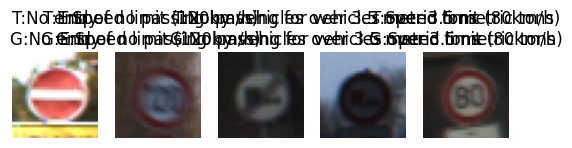

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 5 rastgele örnek seçelim
indices = np.random.choice(len(X_test), 5, replace=False)

for i, idx in enumerate(indices):
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"T:{label_dict[pred_label]}\nG:{label_dict[true_label]}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


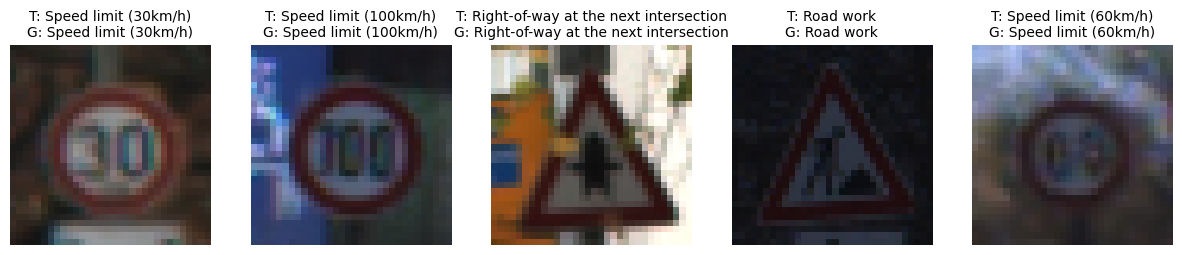

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Test setinden rastgele 5 örnek seçelim
indices = np.random.choice(len(X_test), 5, replace=False)

plt.figure(figsize=(15,5))
for i, idx in enumerate(indices):
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    # Başlıkta tahmin ve gerçeği düzgün yazdıralım
    plt.title(f"T: {label_dict[pred_label]}\nG: {label_dict[true_label]}", fontsize=10)

plt.show()
